# Why Is Samsung Smart TV Not For Me?

## 1. ASK
### Define the problem & ask the right question

- What smart TV should I buy?


- I asked my parents and friends for recommendations. My parents recommended Samsung products(as always), and my friends recommended Theham and Innos products. Theham and Innos are SMEs based in Seoul and specialized in the development and sales of TVs.


- I like to refer to Naver Shopping's price comparisons and reviews when purchasing products with a wide range of choices. So, again, I decided to look into the products people bought the most on Naver Shopping.

## 2. PREPARE
### Collect data

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
from tqdm import tqdm_notebook
import pandas as pd
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import platform 
import warnings
warnings.filterwarnings('ignore')

- Crawled data from https://search.shopping.naver.com/ on 2nd FEB, 2022

In [2]:
driver = webdriver.Chrome('c:/YS/chromedriver.exe')
url = "https://search.shopping.naver.com/search/all?frm=NVSHMDL&origQuery=smartTV&pagingIndex=1&pagingSize=40&productSet=model&query=smartTV&sort=review&timestamp=&viewType=list"
driver.get(url)

- Parse HTML

In [3]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [4]:
prod_items = soup.select('div.basicList_inner__eY_mq')
len(prod_items)

40

- Extract product information from HTML

In [5]:
title = prod_items[0].select('div.basicList_title__3P9Q7 > a')[0].text.strip()
print(title)

이노스 S6501KU


In [6]:
spec_list = prod_items[0].select('div.basicList_detail_box__3ta3h')[0].text.strip()
print(spec_list)

종류 : LED|TV화면크기 : 165.1cm(65인치)|해상도 : UHD(4K)|패널 : LG패널|스마트 : 쿼드코어, 유튜브, 인터넷, 스마트리모컨, 넷플릭스5.1, 프라임비디오|출시년도 : 2021년형|기술 : HDR10|기능 : 크로마서브샘플링(4:4:4)|USB기능 : USB재생(동영상,사진)|부가기능 : WiFi, 스피커내장, 스마트기능, 게임TV, HDMI 2.0 지원, 플리커프리, HDMI ARC, HDMI CEC, 3초 부팅, HDCP 2.2 지원|파일공유 : WiFi다이렉트|화면공유 : 스크린미러링, 미라캐스트, 스마트뷰, Wi-Di, 스크린캐스트|음향 : 10W(2채널), 돌비디지털Plus|백라이트 : 직하형|명암비 : 1,500 : 1|응답속도 : 6ms|주사율 : 60Hz|색표현 : 10bit컬러지원|밝기 : 400CD|동적명암비 : 1,000,000 : 1|화면비율 : 16:9|인공지능프로세서 : MSTAR 6886칩셋|구성품 : 스마트리모컨, 통합리모컨|서브픽셀 : RGB|VESA간격 : 300x200mm|단자 : HDMI(3개), USB(2개), 이어폰, RF, LAN, Optical|LAN : 유,무선랜|에너지효율 : 1등급|소비전력 : 62W|평균소비전력 : 180W|대기전력 : 0.3W|제품무상보증 : 1년(+유상:4년)|패널무상보증 : 2년|형태 : 평면형|무게(스탠드제외) : 16.8 (스탠드포함)kg|두께 : 258 (스탠드포함)mm|1년전기료 : 약 22,000원


In [7]:
price = prod_items[0].select('span.price_num__2WUXn')[0].text.strip().replace(",","")
print(price)

588000원


In [8]:
reviews = prod_items[0].select('em.basicList_num__1yXM9')[0].text.strip().replace(",","")
print(reviews)

7114


In [9]:
prod_data = []
for prod_item in prod_items:
    try:
        title = prod_item.select('div.basicList_title__3P9Q7 > a')[0].text.strip()
        spec_list = prod_item.select('div.basicList_info_area__17Xyo')[0].text.strip()
        price = prod_item.select('span.price_num__2WUXn')[0].text.strip().replace(",", "")
        reviews = prod_items[0].select('em.basicList_num__1yXM9')[0].text.strip().replace(",","")
        prod_data.append([title, spec_list, price])
    except:
        pass 
print(len(prod_data))
#print(prod_data)

40


In [10]:
def get_prod_items(prod_items):
    prod_data = []
    for prod_item in prod_items:
        try:
            title = prod_item.select('div.basicList_title__3P9Q7 > a')[0].text.strip()
            spec_list = prod_item.select('div.basicList_detail_box__3ta3h')[0].text.strip()
            price = prod_item.select('span.price_num__2WUXn')[0].text.strip().replace(",", "")
            reviews = prod_item.select('em.basicList_num__1yXM9')[0].text.strip().replace(",","")
            prod_data.append([title, spec_list, price, reviews])
        except:
            pass  
    return prod_data

In [11]:
prod_items = soup.select('li.basicList_item__2XT81 > div.basicList_inner__eY_mq')
prod_data = get_prod_items(prod_items)
print(len(prod_data))

40


In [12]:
def get_search_page_url(keyword, page, maxprice):
    return "https://search.shopping.naver.com/search/all?frm=NVSHMDL&pagingIndex={}&pagingSize=40&productSet=model&query={}&sort=review&timestamp=&maxPrice={}&minPrice=0&viewType=list".format(page, keyword, maxprice)

keyword = 'smartTV'
page = 1
maxprice = '3000000'
url = get_search_page_url(keyword, page, maxprice)
print(url)

https://search.shopping.naver.com/search/all?frm=NVSHMDL&pagingIndex=1&pagingSize=40&productSet=model&query=smartTV&sort=review&timestamp=&maxPrice=3000000&minPrice=0&viewType=list


In [13]:
driver = webdriver.Chrome('c:/YS/chromedriver.exe')
driver.implicitly_wait(3)

keyword = 'smartTV'
total_page = 5
prod_data_total = []

for page in tqdm_notebook(range(1, total_page + 1)):
    url = get_search_page_url(keyword, page, maxprice)
    driver.get(url)
    time.sleep(5)

    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    prod_items = soup.select('li.basicList_item__2XT81 > div.basicList_inner__eY_mq')
    prod_item_list = get_prod_items(prod_items)
    
    prod_data_total = prod_data_total + prod_item_list

  0%|          | 0/5 [00:00<?, ?it/s]

- Save collected data

In [14]:
data = pd.DataFrame(prod_data_total)
data.columns = ['Title', 'Specs', 'Price', 'Reviews']
data.to_excel('./files/naver_crawling_result.xlsx', index = False)

## 3. PROCESS
### Clean data, determine data bias, make data more consistent

In [15]:
data = pd.read_excel('./files/naver_crawling_result.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    196 non-null    object
 1   Specs    196 non-null    object
 2   Price    196 non-null    object
 3   Reviews  196 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.2+ KB


- 196 products as 4 out of 200 are EoS

In [16]:
data.head()

,Title,Specs,Price,Reviews
0,이노스 S6501KU,종류 : LED|TV화면크기 : 165.1cm(65인치)|해상도 : UHD(4K)|...,588000원,7114
1,더함 코스모 C551UHD,종류 : LED|TV화면크기 : 139.7cm(55인치)|해상도 : UHD(4K)|...,343100원,5793
2,더함 노바 N431UHD IPS,종류 : LED|TV화면크기 : 109.22cm(43인치)|해상도 : UHD(4K)...,278950원,5644
3,삼성전자 삼성 KU65UT8070FXKR,종류 : LED|TV화면크기 : 165.1cm(65인치)|해상도 : UHD(4K)|...,1248870원,4944
4,삼성전자 삼성 KU75UT8070FXKR,종류 : LED|TV화면크기 : 190.5cm(75인치)|해상도 : UHD(4K)|...,2089000원,4886


- Split Title into Brand and Model

In [17]:
brand_list = []
product_list = []
for title in data['Title']:
    title_info = title.split(' ', 1)
    brand_name = title_info[0]
    product_name = title_info[1]
    brand_list.append(brand_name)
    product_list.append(product_name)

- Find resolution and screen size from Specs

In [18]:
spec_list = data['Specs'][0].split('|')
spec_list 

['종류 : LED',
 'TV화면크기 : 165.1cm(65인치)',
 '해상도 : UHD(4K)',
 '패널 : LG패널',
 '스마트 : 쿼드코어, 유튜브, 인터넷, 스마트리모컨, 넷플릭스5.1, 프라임비디오',
 '출시년도 : 2021년형',
 '기술 : HDR10',
 '기능 : 크로마서브샘플링(4:4:4)',
 'USB기능 : USB재생(동영상,사진)',
 '부가기능 : WiFi, 스피커내장, 스마트기능, 게임TV, HDMI 2.0 지원, 플리커프리, HDMI ARC, HDMI CEC, 3초 부팅, HDCP 2.2 지원',
 '파일공유 : WiFi다이렉트',
 '화면공유 : 스크린미러링, 미라캐스트, 스마트뷰, Wi-Di, 스크린캐스트',
 '음향 : 10W(2채널), 돌비디지털Plus',
 '백라이트 : 직하형',
 '명암비 : 1,500 : 1',
 '응답속도 : 6ms',
 '주사율 : 60Hz',
 '색표현 : 10bit컬러지원',
 '밝기 : 400CD',
 '동적명암비 : 1,000,000 : 1',
 '화면비율 : 16:9',
 '인공지능프로세서 : MSTAR 6886칩셋',
 '구성품 : 스마트리모컨, 통합리모컨',
 '서브픽셀 : RGB',
 'VESA간격 : 300x200mm',
 '단자 : HDMI(3개), USB(2개), 이어폰, RF, LAN, Optical',
 'LAN : 유,무선랜',
 '에너지효율 : 1등급',
 '소비전력 : 62W',
 '평균소비전력 : 180W',
 '대기전력 : 0.3W',
 '제품무상보증 : 1년(+유상:4년)',
 '패널무상보증 : 2년',
 '형태 : 평면형',
 '무게(스탠드제외) : 16.8 (스탠드포함)kg',
 '두께 : 258 (스탠드포함)mm',
 '1년전기료 : 약 22,000원']

In [19]:
for spec in spec_list:
    if '해상도' in spec:  # Resolution 
         panel_spec = spec 
    elif 'TV화면크기' in spec:  # Screen Size
        size_spec = spec
        
print(panel_spec)
print(size_spec)

해상도 : UHD(4K)
TV화면크기 : 165.1cm(65인치)


In [20]:
panel_value = panel_spec.split(' : ')[1].strip()
size_value = size_spec.split(' : ')[1].strip()

print(panel_value)
print(size_value)

UHD(4K)
165.1cm(65인치)


In [21]:
panel_list = []
size_list = [] 

for spec_data in data['Specs']:
    spec_list = spec_data.split('|')

    panel_value = None 
    size_value = None 

    for spec in spec_list:
        if '해상도' in spec: 
            panel_value = spec.split(' : ')[1].strip()             
        if 'TV화면크기' in spec:
            size_value = spec.split(' : ')[1].strip() 
    panel_list.append(panel_value)
    size_list.append(size_value)

In [22]:
print("Resolution :", len(panel_list), panel_list[0:5])
print("Screen Size :", len(size_list), size_list[0:5])

Resolution : 196 ['UHD(4K)', 'UHD(4K)', 'UHD(4K)', 'UHD(4K)', 'UHD(4K)']
Screen Size : 196 ['165.1cm(65인치)', '139.7cm(55인치)', '109.22cm(43인치)', '165.1cm(65인치)', '190.5cm(75인치)']


In [23]:
reviews_list = []
for reviews in data['Reviews']:
    reviews_list.append(reviews)

- Save preprocessed data

In [24]:
pd_data = pd.DataFrame()
pd_data['Brand'] = brand_list
pd_data['Model'] = product_list
pd_data['Price'] = data['Price']
pd_data['Resolution'] = panel_list
pd_data['Screen Size'] = size_list
pd_data['Reviews'] = reviews_list
pd_data.head()

,Brand,Model,Price,Resolution,Screen Size,Reviews
0,이노스,S6501KU,588000원,UHD(4K),165.1cm(65인치),7114
1,더함,코스모 C551UHD,343100원,UHD(4K),139.7cm(55인치),5793
2,더함,노바 N431UHD IPS,278950원,UHD(4K),109.22cm(43인치),5644
3,삼성전자,삼성 KU65UT8070FXKR,1248870원,UHD(4K),165.1cm(65인치),4944
4,삼성전자,삼성 KU75UT8070FXKR,2089000원,UHD(4K),190.5cm(75인치),4886


In [25]:
pd_data['Brand'].unique()

array(['이노스', '더함', '삼성전자', '이스트라', '루컴즈전자', 'LG전자', '프리즘코리아', '유맥스',
       '한성컴퓨터', '와사비망고', '필립스', '피디케이전자', '앤트웍스', '이엔티비', '스마트뷰', '라익미'],
      dtype=object)

In [26]:
pd_data['Brand'] = pd_data['Brand'].replace({'이노스':'Innos', '더함':'Theham', '삼성전자':'Samsung', '이스트라':'Estla', 
                                             '루컴즈전자':'Lucoms', 'LG전자':'LG', '프리즘코리아':'Prismkorea', '유맥스':'Umaxx', 
                                             '한성컴퓨터':'Hansung', '와사비망고':'Wasabimango', '필립스':'Philips', '피디케이전자':'PDK', 
                                             '앤트웍스':'Antworks', '이엔티비':'ENTV', '스마트뷰':'Smartview', '라익미':'Likeme'})
pd_data['Brand'].unique()

array(['Innos', 'Theham', 'Samsung', 'Estla', 'Lucoms', 'LG',
       'Prismkorea', 'Umaxx', 'Hansung', 'Wasabimango', 'Philips', 'PDK',
       'Antworks', 'ENTV', 'Smartview', 'Likeme'], dtype=object)

In [27]:
pd_data['Price'] = pd_data['Price'].str.replace('원','')  # KRW
pd_data['Screen Size'] = pd_data['Screen Size'].str[-5:-3]  # Inches
pd_data.head()

,Brand,Model,Price,Resolution,Screen Size,Reviews
0,Innos,S6501KU,588000,UHD(4K),65,7114
1,Theham,코스모 C551UHD,343100,UHD(4K),55,5793
2,Theham,노바 N431UHD IPS,278950,UHD(4K),43,5644
3,Samsung,삼성 KU65UT8070FXKR,1248870,UHD(4K),65,4944
4,Samsung,삼성 KU75UT8070FXKR,2089000,UHD(4K),75,4886


In [28]:
pd_data_final = pd_data
pd_data_final.to_excel('./files/naver_data_final.xlsx', index = False)

## 4. ANALYZE
### What stories data's telling? Reveal gaps & opportunities

In [29]:
smarttv_data = pd.read_excel('./files/naver_data_final.xlsx')
smarttv_data.head()

,Brand,Model,Price,Resolution,Screen Size,Reviews
0,Innos,S6501KU,588000,UHD(4K),65.0,7114
1,Theham,코스모 C551UHD,343100,UHD(4K),55.0,5793
2,Theham,노바 N431UHD IPS,278950,UHD(4K),43.0,5644
3,Samsung,삼성 KU65UT8070FXKR,1248870,UHD(4K),65.0,4944
4,Samsung,삼성 KU75UT8070FXKR,2089000,UHD(4K),75.0,4886


In [30]:
print(smarttv_data['Screen Size'].min())
print(smarttv_data['Screen Size'].max())

32.0
86.0


#### Screen sizes range from 32 to 86 inches

In [31]:
top_list = smarttv_data.sort_values(['Screen Size','Reviews'], ascending=False)
top_list.head(20)

,Brand,Model,Price,Resolution,Screen Size,Reviews
130,Innos,S8601KU,1896730,UHD(4K),86.0,277
165,Theham,우버 U863UHD IPS,1996170,UHD(4K),86.0,172
182,LG,86UP8770PUA(해외전용),2414990,UHD(4K),86.0,149
190,Innos,네츄럴 S8630GG 스마트 Pure Sound,2096100,UHD(4K),86.0,132
194,Estla,AN860UHD 안드로이드 더 스마트 AI,1990150,UHD(4K),86.0,122
96,Samsung,삼성 KU85UA8070FXKR,2748890,UHD(4K),85.0,398
122,Samsung,삼성 KQ85QA60AFXKR,2952550,UHD(4K),85.0,298
140,Samsung,삼성 KU85UA7000FXKR,2348760,UHD(4K),85.0,238
4,Samsung,삼성 KU75UT8070FXKR,2089000,UHD(4K),75.0,4886
21,Samsung,삼성 KU75UA8070FXKR,1645820,UHD(4K),75.0,1904


#### Large companies(Samsung and LG) are the major players in The market of 75 inch+ smart TVs

In [32]:
print(smarttv_data['Price'].min())
print(smarttv_data['Price'].max())

0
2952550


In [33]:
print(smarttv_data.loc[smarttv_data['Price'] == 0])

     Brand       Model  Price Resolution  Screen Size  Reviews
47  Theham  노바 N493UHD      0    UHD(4K)         49.0      908


In [34]:
smarttv_data = smarttv_data.drop(47)

In [35]:
print(smarttv_data['Price'].min())
print(smarttv_data['Price'].max())

124000
2952550


#### Prices range from 124,000 to 2,952,550 won.

In [36]:
top_list = smarttv_data.sort_values(['Price'], ascending = True)
top_list.head(20)

,Brand,Model,Price,Resolution,Screen Size,Reviews
155,Smartview,J32PE,124000,NaN,32.0,185
46,Innos,S3201KU,208000,HD,32.0,910
115,Lucoms,루컴즈 T3206TA,241430,HD,32.0,325
65,Lucoms,루컴즈 T32G2C,269000,HD,32.0,568
45,Innos,S4001KU,278000,Full HD,40.0,912
2,Theham,노바 N431UHD IPS,278950,UHD(4K),43.0,5644
142,PDK,스마트에버 SW32F,289000,Full HD,32.0,229
180,Theham,노바 N431UHD VA,295440,UHD(4K),43.0,152
74,Wasabimango,WM UV430 UHD,295450,UHD(4K),43.0,504
25,Lucoms,루컴즈 T4002C,298990,Full HD,40.0,1694


#### SMEs lead the market of affordable smart TVs costing less than 350,000 won(appx. $290).
#### The price of smart TVs they provide is generally proportional to the screen size.

In [37]:
top_list = smarttv_data.sort_values(['Price','Screen Size'], ascending=[True, False])
top_list.head(20)

,Brand,Model,Price,Resolution,Screen Size,Reviews
155,Smartview,J32PE,124000,NaN,32.0,185
46,Innos,S3201KU,208000,HD,32.0,910
115,Lucoms,루컴즈 T3206TA,241430,HD,32.0,325
65,Lucoms,루컴즈 T32G2C,269000,HD,32.0,568
45,Innos,S4001KU,278000,Full HD,40.0,912
2,Theham,노바 N431UHD IPS,278950,UHD(4K),43.0,5644
142,PDK,스마트에버 SW32F,289000,Full HD,32.0,229
180,Theham,노바 N431UHD VA,295440,UHD(4K),43.0,152
74,Wasabimango,WM UV430 UHD,295450,UHD(4K),43.0,504
25,Lucoms,루컴즈 T4002C,298990,Full HD,40.0,1694


In [38]:
price_mean_value = smarttv_data['Price'].mean()
size_mean_value = smarttv_data['Screen Size'].mean()
reviews_mean_value = smarttv_data['Reviews'].mean()
print("Average Price :", price_mean_value.round(2))
print("Average Screen Size :", size_mean_value.round(2))
print("Average Reviews :", reviews_mean_value.round(2))

Average Price : 1032062.17
Average Screen Size : 58.92
Average Reviews : 808.45


#### Bang for the buck

In [39]:
condition_data = smarttv_data [
    (smarttv_data['Price'] <= price_mean_value) & 
    (smarttv_data['Screen Size'] >= size_mean_value) & 
    (smarttv_data['Reviews'] >= reviews_mean_value)]
condition_data

,Brand,Model,Price,Resolution,Screen Size,Reviews
0,Innos,S6501KU,588000,UHD(4K),65.0,7114
5,Theham,노바 N651UHD IPS,543540,UHD(4K),65.0,4618
7,Theham,코스모 C651UHD,534810,UHD(4K),65.0,3524
12,Theham,우버 U651UHD,659000,UHD(4K),65.0,2747
20,Lucoms,루컴즈 T6503TU IPS HDR,679000,UHD(4K),65.0,1937
37,Innos,S7501KU WIFI,999000,UHD(4K),75.0,1142
38,Estla,QUKA UC651UHD 더 스마트 AI PRO,716480,UHD(4K),65.0,1081


## 5. VISUALIZE
### Communicate findings effectively

In [40]:
chart_data = smarttv_data.dropna(axis = 0)
len(chart_data)

149

In [41]:
size_max_value = chart_data['Screen Size'].max()
size_min_value = chart_data['Screen Size'].min()
size_mean_value = chart_data['Screen Size'].mean()
price_max_value = chart_data['Price'].max()
price_min_value = chart_data['Price'].min()
price_mean_value = chart_data['Price'].mean()

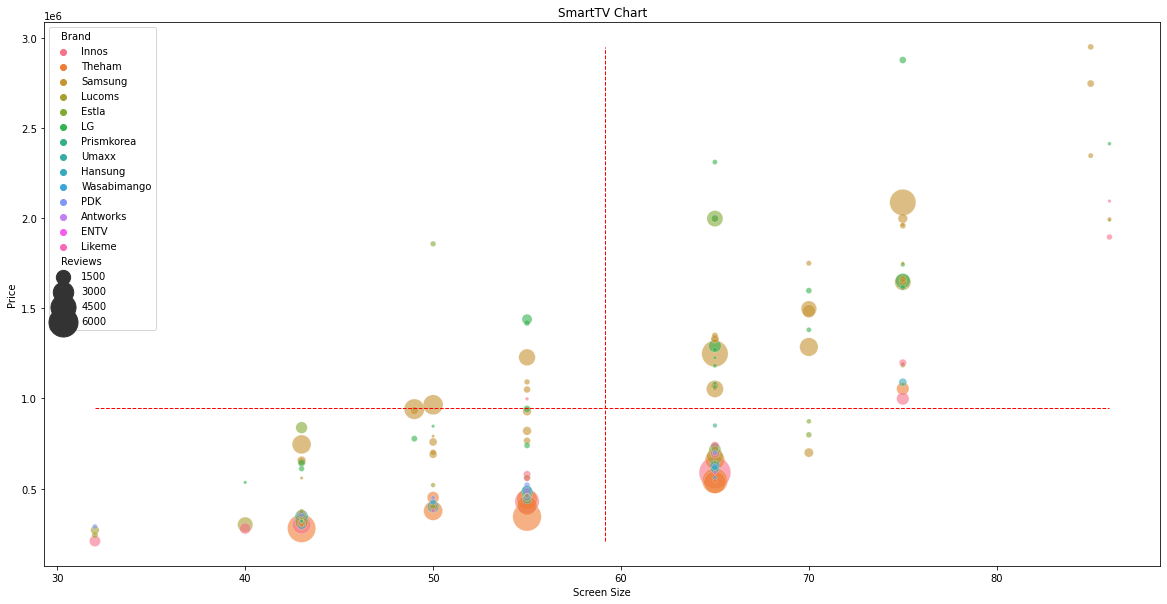

In [42]:
plt.figure(figsize=(20, 10))
plt.title("SmartTV Chart")
sns.scatterplot(x = 'Screen Size', y = 'Price', size = 'Reviews', hue = chart_data['Brand'], 
             data = chart_data, sizes = (10, 1000), legend = True, alpha=0.6, cmap='Spectral')
plt.plot([size_min_value, size_max_value], 
          [price_mean_value, price_mean_value], 
          'r--', 
          lw = 1 )
plt.plot([size_mean_value, size_mean_value], 
          [price_min_value, price_max_value], 
          'r--', 
          lw = 1 )
plt.show()

#### Top 20 Products

In [43]:
chart_data_selected = chart_data[:20]
chart_data_selected

,Brand,Model,Price,Resolution,Screen Size,Reviews
0,Innos,S6501KU,588000,UHD(4K),65.0,7114
1,Theham,코스모 C551UHD,343100,UHD(4K),55.0,5793
2,Theham,노바 N431UHD IPS,278950,UHD(4K),43.0,5644
3,Samsung,삼성 KU65UT8070FXKR,1248870,UHD(4K),65.0,4944
4,Samsung,삼성 KU75UT8070FXKR,2089000,UHD(4K),75.0,4886
5,Theham,노바 N651UHD IPS,543540,UHD(4K),65.0,4618
6,Innos,S5501KU ZeroBezel,428000,UHD(4K),55.0,4219
7,Theham,코스모 C651UHD,534810,UHD(4K),65.0,3524
8,Theham,우버 U553UHD,439000,UHD(4K),55.0,3063
9,Samsung,삼성 UN49NU7150FXKR,941000,UHD(4K),49.0,2938


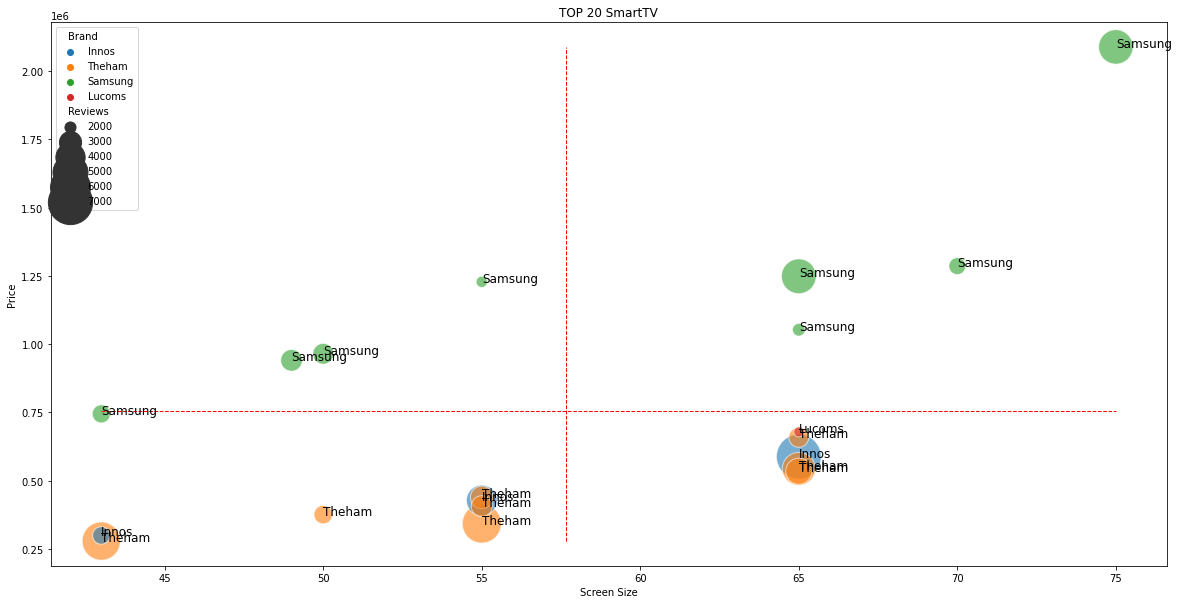

In [44]:
size_max_value = chart_data_selected['Screen Size'].max()
size_min_value = chart_data_selected['Screen Size'].min()
size_mean_value = chart_data_selected['Screen Size'].mean()
price_max_value = chart_data_selected['Price'].max()
price_min_value = chart_data_selected['Price'].min()
price_mean_value = chart_data_selected['Price'].mean()
plt.figure(figsize=(20, 10))
plt.title("TOP 20 SmartTV")
sns.scatterplot(x = 'Screen Size', 
                  y = 'Price', 
                  size = 'Reviews', 
                  hue = chart_data_selected['Brand'], 
                  data = chart_data_selected, sizes = (100, 2000),
                  legend = True,
                  alpha=0.6, 
                  cmap='Spectral')
plt.plot([size_min_value, size_max_value], 
          [price_mean_value, price_mean_value], 
          'r--', 
          lw = 1 )
plt.plot([size_mean_value, size_mean_value], 
          [price_min_value, price_max_value], 
          'r--', 
          lw = 1 )
for index, row in chart_data_selected.iterrows():
    x = row['Screen Size']
    y = row['Price']
    s = row['Brand']
    plt.text(x, y, s, size=12)
plt.show()

## 6. SHARE
### Data-driven storytelling

#### 1) Most of the top 200 smart TVs offer a high picture quality with a 4K resolution.
Screen size and brand may have a bigger impact on selection than screen resolution.

#### 2) If you are looking for a large smart TV for the price, Samsung and LG may not be for you.
Among the top 20, Innos' 65-inch TV is cheaper than Samsung's 43-inch TV. If brand matters to you, expect to pay at least 750,000 won(appx. $620).

#### 3) The most preferred screen sizes are 65 inches and 55 inches.

#### 4) Those with a large room have a relatively high budget for buying a smart TV.
The screen size is proportional to the viewing distance, and the viewing distance is proportional to the room size. Among the top 20, Samsung's most popular 75-inch smart TV costs 1.7 times more than its 65-inch smart TV and 3.6 times more than Innos' 65-inch smart TV.

#### 5) Samsung is superior to LG in smart TV market.
The number of models included in the top 20 is 8 for Samsung and 0 for LG.